In [18]:
import os
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


from scr.pytorch_data_loaders import ImageDataset
from scr.pytorch_model_defs import WaterPlasticModel

1. Load a Test Image

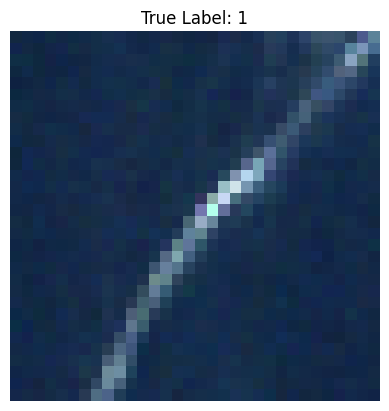

In [17]:
# Load a single datapoint (originally from test dataset)
with open("data/single_datapoint.pkl", "rb") as f:
    test_image, test_label = pickle.load(f)


# Display the loaded test image for verification
rgb_image = np.transpose(test_image,(1,2,0))
plt.imshow((rgb_image / np.max(rgb_image) * 255).astype(np.uint8)[:,:,[3,2,1]])
plt.title(f"True Label: {test_label}")
plt.axis("off")
plt.show()

2. Load the Trained Model

In [20]:
model = torch.load('models/pytorch_models/100_epochs_classweights_augmentations.pth', weights_only=False)

3. Run Inference

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)


In [38]:
test_dataset = ImageDataset([test_image], [test_label], transform=None)
# need this for model prediction, sorry for bloat.
test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,     
    num_workers=4,
    pin_memory=True
)

In [43]:
# predict the model on the test image
model.eval()
for image, label in test_loader:
    predictions = model(image.to(device))

In [52]:
import torch.nn.functional as F
predicted_label = np.argmax(predictions.to('cpu').detach().numpy())
# Display the predictions
print(f"True Label: {test_label}")
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {F.softmax(predictions, dim=1)}")

True Label: 1
Predicted Label: 1
Prediction Probabilities: tensor([[0.0129, 0.9871]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


4. Display Results

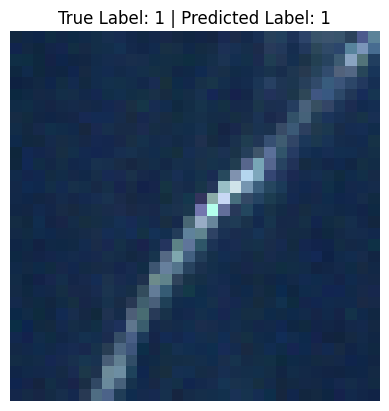

In [54]:
plt.imshow((rgb_image / np.max(rgb_image) * 255).astype(np.uint8)[:,:,[3,2,1]])
plt.title(f"True Label: {test_label} | Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()